## So far we didn't see any forward-backward asymmetry in brownian particle trajectories when predicting it using bayesian NN with MCMC. Maybe it's because MCMC incapsulates the convergence process and we might actually not see that forward and backward converge at different rates. Let's switch to Variational Inference and look at the ELBO learning curve instead to check that.

In [1]:
from typing import Optional, List, Iterable, Tuple, Dict
import os

import matplotlib.pyplot as plt
import numpy as np
import torch
import tqdm

import numpy.typing
NDArray = numpy.typing.NDArray[np.floating]

In [2]:
from brownian_datagen import (BrownianDatagen,
                              create_dataholder_for_windows_and_targets,
                              create_simple_flip_dataholder_for_windows_and_targets)
from bayesian import plot_predictions, quality_metrics
from bayesian_varinf import (ExpResultsWithLosses,
                             posterior_predictive_forward_and_backward,
                             train_fb_n_times,
                             load_learning_curves)

(<Figure size 500x1000 with 3 Axes>,
 array([<Axes: title={'center': 'Forward trajectories'}, xlabel='index', ylabel='coordinate of the particle, forward'>,
        <Axes: title={'center': 'Backward trajectories'}, xlabel='index', ylabel='coordinate of the particle, backward'>,
        <Axes: title={'center': 'Work distributions'}>], dtype=object))

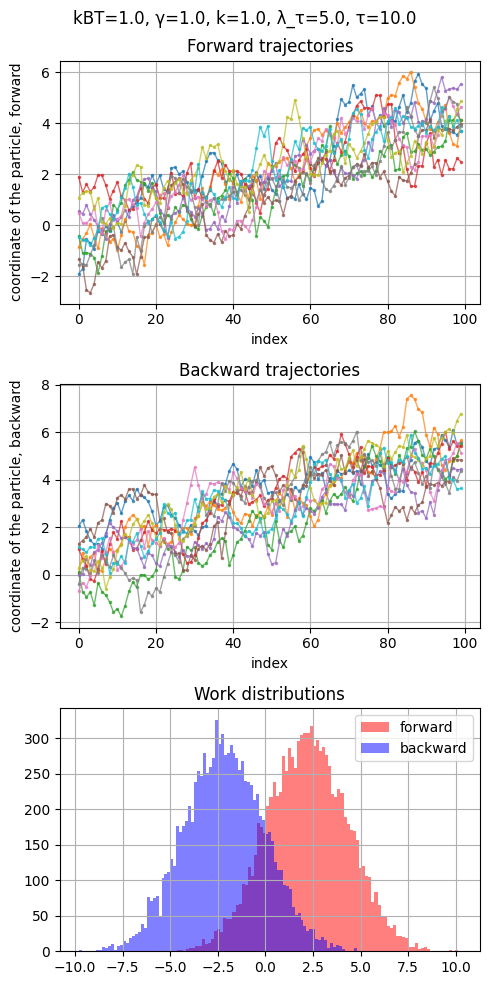

In [3]:
save_dir = "20230724_preds/brownian_varinf/00/"
brownian = BrownianDatagen(kBT=1., γ=1., k=1., λ_τ=5., τ=10.)
dt = create_dataholder_for_windows_and_targets(brownian, numParticles=30, rng_seed=42)
brownian.visualize()

In [4]:
# !rm -rf $save_dir

In [5]:
if not os.path.isdir(save_dir):
    posterior_predictive_forward_and_backward(dt, save_dir)
else:
    print(f"Directory '{save_dir}' exists, assuming the previous results are reusable")

Directory '20230724_preds/brownian_varinf/00/' exists, assuming the previous results are reusable


In [6]:
er = ExpResultsWithLosses(save_dir)
er.losses_f

tensor([1.2282e+12, 6.8014e+11, 4.4177e+11, 1.0261e+11, 6.3564e+10, 8.1431e+09,
        6.7243e+09, 2.1668e+09, 1.0204e+09, 7.5721e+08, 1.3531e+08, 2.7971e+09,
        2.6078e+09, 6.7519e+08, 4.2182e+09, 1.6976e+09, 2.3330e+09, 7.3826e+08,
        4.6588e+08, 7.7688e+08, 1.1133e+08, 1.2366e+09, 1.5057e+08, 2.9170e+08,
        5.0932e+08, 5.0870e+08, 4.8856e+07, 1.5616e+08, 1.7935e+08, 1.7702e+08,
        1.6831e+08, 5.8362e+08, 6.4142e+08, 4.4442e+08, 1.2175e+08, 4.1979e+08,
        4.0458e+08, 7.3600e+07, 4.9965e+07, 6.0532e+07, 4.4815e+08, 1.4246e+08,
        1.1661e+07, 3.0719e+07, 5.9973e+07, 1.0975e+08, 1.3378e+09, 4.1279e+07,
        4.2967e+08, 4.1904e+08, 2.6772e+07, 3.5875e+07, 3.1054e+07, 7.5418e+07,
        6.9007e+07, 2.1358e+07, 4.6319e+07, 1.3828e+08, 5.1523e+08, 1.7167e+08,
        7.3567e+07, 1.6317e+08, 1.4487e+08, 2.1040e+07, 5.9697e+07, 1.2782e+08,
        1.7530e+07, 2.5951e+08, 1.6149e+07, 8.9555e+07, 5.1052e+07, 3.9548e+08,
        1.4310e+08, 1.8457e+07, 2.4954e+

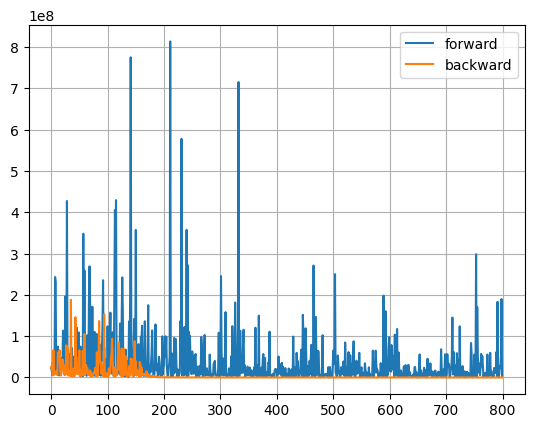

In [7]:
plt.plot(er.losses_f[200:], label="forward")
plt.plot(er.losses_b[200:], label="backward")
plt.grid()
plt.legend()

## Ok, the learning curves are too noisy, let's attempt to run train loop N times to average them.

In [8]:
save_dir_prefix = "20230724_preds/brownian_varinf/distribution01/"
num_runs = 500

train_fb_n_times(dt, num_runs=num_runs, save_dir_prefix=save_dir_prefix)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [1:20:40<00:00,  9.68s/it]


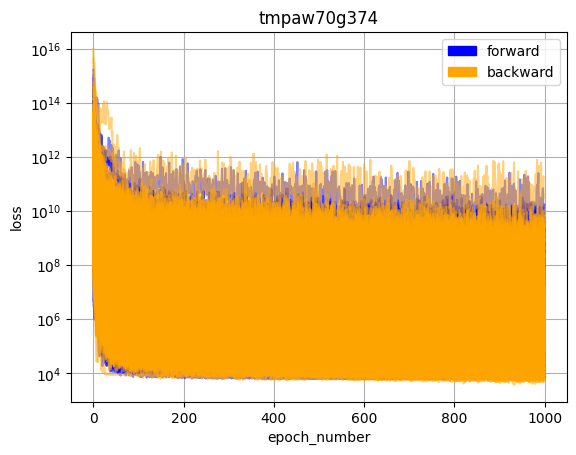

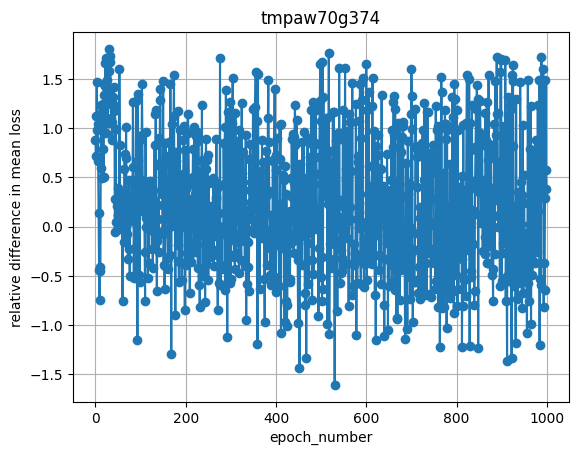

In [9]:
l = load_learning_curves(save_dir_prefix=save_dir_prefix, num_runs=num_runs)
l.plot_learning_curves()
l.plot_relmeandiff_vs_epoch()

## Try on a different dataset: brownian particle with a different set of params and work distributions more separated

(<Figure size 500x1000 with 3 Axes>,
 array([<Axes: title={'center': 'Forward trajectories'}, xlabel='index', ylabel='coordinate of the particle, forward'>,
        <Axes: title={'center': 'Backward trajectories'}, xlabel='index', ylabel='coordinate of the particle, backward'>,
        <Axes: title={'center': 'Work distributions'}>], dtype=object))

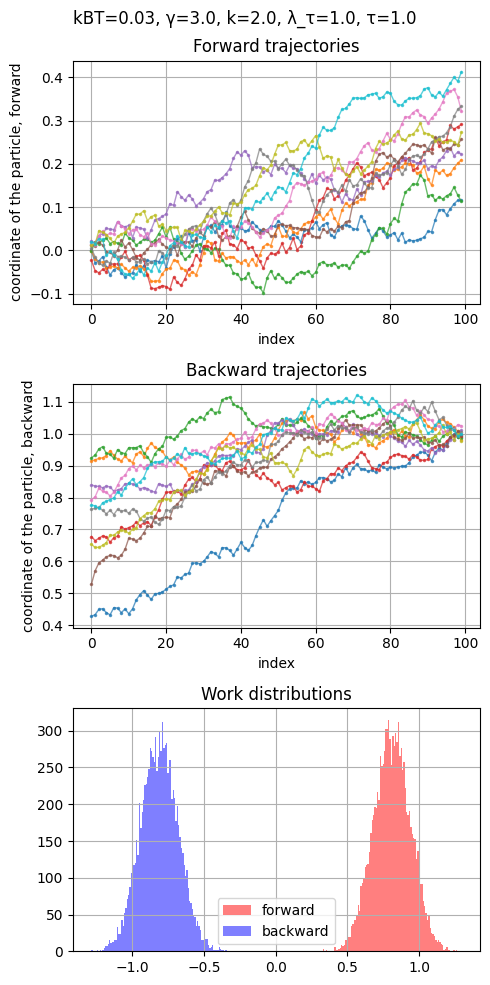

In [10]:
brownian = BrownianDatagen(kBT=0.03, γ=3., k=2., λ_τ=1., τ=1.)
brownian.visualize()

In [11]:
dt = create_dataholder_for_windows_and_targets(brownian, numParticles=50, rng_seed=42)
save_dir_prefix = "20230724_preds/brownian_varinf/distribution02/"
num_runs = 500

train_fb_n_times(dt, num_runs=num_runs, save_dir_prefix=save_dir_prefix)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [1:26:24<00:00, 10.37s/it]


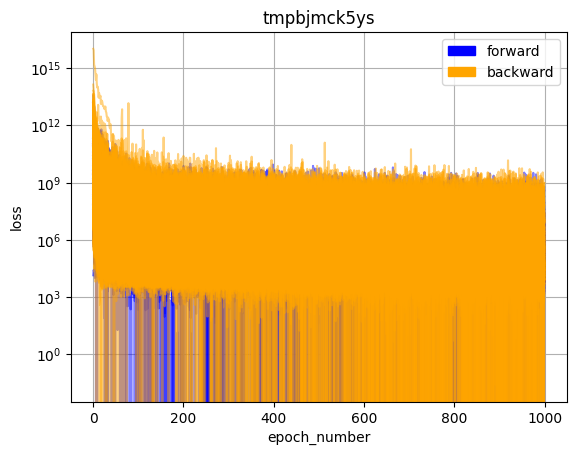

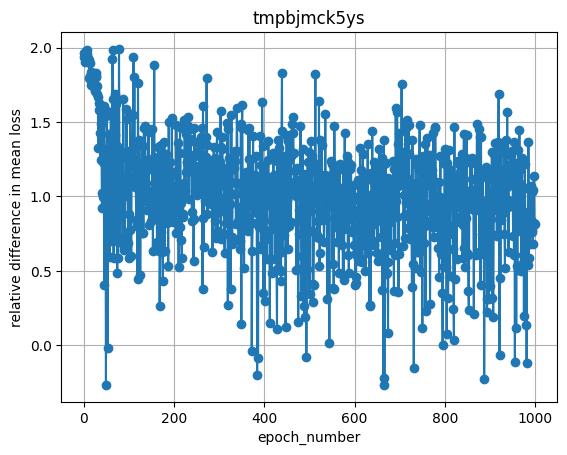

In [12]:
l = load_learning_curves(save_dir_prefix=save_dir_prefix, num_runs=num_runs)
l.plot_learning_curves()
l.plot_relmeandiff_vs_epoch()